# Spotify API

The following code shows how you can extract Spotify data in Python. I obtained a playlist and conducted exploratory data analysis. This can be used for Machine Learning.

- Get spotipy package: https://spotipy.readthedocs.io/en/2.19.0/
- Get ID's to access Spotify's API: https://developer.spotify.com/

In [ ]:
#Install spotipy
pip install spotipy --upgrade

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
import seaborn as sns

In [80]:
# Authenticate Spotify API
# id and secret keys can be obtained from Spotify Developer link

id = 'bac4b759e5b849eaaf680041d0302a8f'
secret = '3587324ba3bd4b06b131107005584404'

client_credentials_manager = SpotifyClientCredentials(client_id=id, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [81]:
# We need to get the song's ID to get its information
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

#Get playlist track ids using username and playlist id
ids = getTrackIDs('spotify', '37i9dQZEVXbLRQDuF5jeBp')

In [4]:
#Verify playlist has 50 songs
print(len(ids))

#Show track ids
print(ids)

50
['02MWAaffLxlfxAUY7c5dvx', '52xJxFP6TqMuO4Yt0eOkMz', '5PjdY0CKGZdEuoNab3yDmX', '1Y5Jvi3eLi4Chwqch9GMem', '1HhNoOuqm1a5MXYEgAFl8o', '6HJIZUOiZDE814XMhRGSZN', '5Z9KJZvQzH6PFmb8SNkxuk', '4SqWKzw0CbA05TGszDgMlc', '4ZtFanR9U6ndgddUvNcjcG', '2BcMwX1MPV6ZHP4tUT9uq6', '6Uj1ctrBOjOas8xZXGqKk4', '2WL6GQzPuK9Nrpy9XwNEbz', '6I3mqTwhRpn34SLVafSH7G', '3Vi5XqYrmQgOYBajMWSvCi', '68Dni7IE4VyPkTOH9mRWHr', '37y7iDayfwm3WXn5BiAoRk', '0e8nrvls4Qqv5Rfa2UhqmO', '58ge6dfP91o9oXMzq3XkIS', '59CfNbkERJ3NoTXDvoURjj', '2QjOHCTQ1Jl3zawyYOpxh6', '3XOalgusokruzA5ZBA2Qcb', '7rglLriMNBPAyuJOMGwi39', '25wdC7CJmCJPgnKw9rYquJ', '4fouWK6XVHhzl78KzQ1UjL', '0oA9wBGDY4uyILLg4GymWP', '7BbaIYAdi3pg4MGl6PHwPv', '50eJOxJiGmJ7PBZaTKpje1', '6K5ph5mq1qprHae3TrgTj5', '50nfwKoDiSYg8zOCREWAm5', '3GZD6HmiNUhxXYf8Gch723', '1ri9ZUkBJVFUdgwzCnfcYs', '5CZ40GBx1sQ9agT82CLQCT', '7KA4W4McWYRpgf0fWsJZWB', '58HvfVOeJY7lUuCqF0m3ly', '1ojBtNRMzjL7ptLPZCzfRz', '3QFInJAm9eyaho5vBzxInN', '2bdqU7C4softKNcMYDFi96', '0DGTcMqvVR7fmBXgiG6jz4', '3DarAbF

In [82]:
#Get playlist track features
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  valence = features[0]['valence']

  track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence]
  return track

In [84]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# Create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

In [87]:
#Convert length to seconds
df['length'] = df['length']/100

In [89]:
#View dataframe
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,2388.05,96,0.761,0.440000,0.525,0.000007,0.0921,-6.900,0.0944,80.870,4,0.5310
1,We Don't Talk About Bruno,Encanto (Original Motion Picture Soundtrack),Lin-Manuel Miranda,2021-11-19,2161.20,95,0.577,0.357000,0.450,0.000000,0.1110,-8.516,0.0834,205.863,4,0.8300
2,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,2021-07-23,1418.05,94,0.591,0.038300,0.764,0.000000,0.1030,-5.484,0.0483,169.928,4,0.4780
3,Super Gremlin,Back For Everything,Kodak Black,2022-02-25,2005.47,78,0.825,0.002650,0.414,0.000000,0.3570,-6.634,0.1440,72.993,4,0.1060
4,Enemy (with JID) - from the series Arcane Leag...,Mercury - Act 1,Imagine Dragons,2021-09-03,1733.81,89,0.728,0.237000,0.783,0.000000,0.4340,-4.424,0.2660,77.011,4,0.5550
5,Soy El Unico,Soy El Unico,Yahritza Y Su Esencia,2022-03-25,2139.99,77,0.708,0.451000,0.449,0.000000,0.1110,-4.369,0.0286,84.396,1,0.6300
6,INDUSTRY BABY (feat. Jack Harlow),MONTERO,Lil Nas X,2021-09-17,2123.52,91,0.741,0.022100,0.691,0.000000,0.0476,-7.395,0.0672,150.087,4,0.8920
7,I Love You So,I Love You So,The Walters,2014-11-28,1602.39,95,0.575,0.583000,0.648,0.000000,0.1150,-4.891,0.0358,75.977,4,0.4660
8,good 4 u,SOUR,Olivia Rodrigo,2021-05-21,1781.46,95,0.563,0.335000,0.664,0.000000,0.0849,-5.044,0.1540,166.928,4,0.6880
9,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,Drake,2021-09-03,2429.65,90,0.849,0.063500,0.424,0.000000,0.0834,-9.579,0.3240,145.887,4,0.1530


To learn more about Spotify's track features: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

In [93]:
#Top 5 most popular songs
df.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,2388.05,96,0.761,0.44000,0.525,0.000007,0.0921,-6.900,0.0944,80.870,4,0.531
1,We Don't Talk About Bruno,Encanto (Original Motion Picture Soundtrack),Lin-Manuel Miranda,2021-11-19,2161.20,95,0.577,0.35700,0.450,0.000000,0.1110,-8.516,0.0834,205.863,4,0.830
2,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,2021-07-23,1418.05,94,0.591,0.03830,0.764,0.000000,0.1030,-5.484,0.0483,169.928,4,0.478
3,Super Gremlin,Back For Everything,Kodak Black,2022-02-25,2005.47,78,0.825,0.00265,0.414,0.000000,0.3570,-6.634,0.1440,72.993,4,0.106
4,Enemy (with JID) - from the series Arcane Leag...,Mercury - Act 1,Imagine Dragons,2021-09-03,1733.81,89,0.728,0.23700,0.783,0.000000,0.4340,-4.424,0.2660,77.011,4,0.555


In [90]:
#Stats summary of top 50 songs
df.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1964.327400,88.040000,0.660380,0.203361,0.628120,0.007957,0.165624,-6.109140,0.100486,121.688100,3.800000,0.500182
std,358.726794,9.136069,0.137688,0.212465,0.159152,0.051882,0.131228,1.968327,0.087373,35.124748,0.638877,0.252795
min,1225.700000,57.000000,0.309000,0.000735,0.225000,0.000000,0.042000,-12.422000,0.028200,72.993000,1.000000,0.064300
25%,1707.562500,85.250000,0.601000,0.023900,0.525500,0.000000,0.092225,-7.604500,0.040725,89.508250,4.000000,0.322000
50%,1974.100000,91.000000,0.683500,0.108850,0.646000,0.000000,0.115500,-5.779000,0.068950,118.982000,4.000000,0.495500
75%,2155.897500,94.000000,0.752500,0.333000,0.744000,0.000026,0.169250,-4.629500,0.104600,145.845750,4.000000,0.686500
max,2927.990000,100.000000,0.913000,0.823000,0.920000,0.367000,0.673000,-2.724000,0.339000,205.863000,4.000000,0.956000


<AxesSubplot:xlabel='popularity', ylabel='Count'>

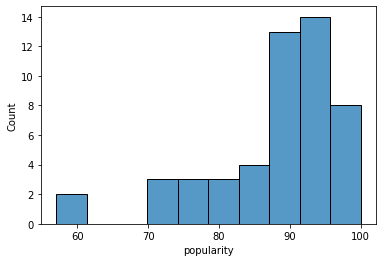

In [9]:
#Distribution of songs by popularity
sns.histplot(df, x='popularity')

<AxesSubplot:xlabel='danceability', ylabel='Count'>

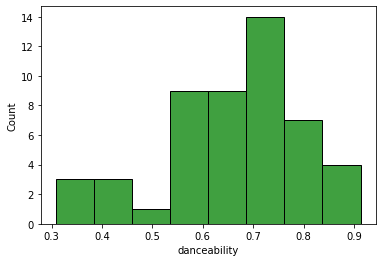

In [94]:
#Distribution of songs by danceability
sns.histplot(df, x='danceability', color='green')

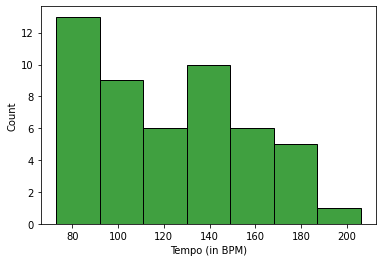

In [99]:
#Distribution of songs by tempo
tempo = sns.histplot(df, x='tempo',color='green').set_xlabel("Tempo (in BPM)")

Text(0.5, 0, 'Length (in seconds)')

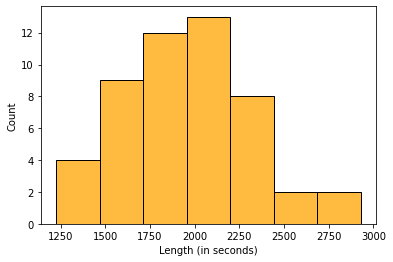

In [111]:
#Distribution of songs by length
sns.histplot(df, x='length',color='orange').set_xlabel("Length (in seconds)")

In [101]:
#Most popular song in the US yesterday
df.loc[[0]]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,2388.05,96,0.761,0.44,0.525,0.000007,0.0921,-6.9,0.0944,80.87,4,0.531


In [102]:
# Most "danceable" song
df.loc[[df['danceability'].idxmax()]]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
29,Lost,channel ORANGE,Frank Ocean,2012-07-10,2340.93,91,0.913,0.0272,0.603,0.000503,0.167,-4.892,0.226,123.061,4,0.497


In [103]:
#Shortest song
df.loc[[df['length'].idxmin()]]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
26,make up sex (feat. blackbear),mainstream sellout,Machine Gun Kelly,2022-03-25,1225.7,80,0.665,0.00156,0.678,0.0,0.474,-4.122,0.0315,131.986,4,0.682


In [105]:
#Songs with the fastest tempo
top_danceability = df.sort_values(by=['tempo'], ascending=False)
top_danceability.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
1,We Don't Talk About Bruno,Encanto (Original Motion Picture Soundtrack),Lin-Manuel Miranda,2021-11-19,2161.20,95,0.577,0.3570,0.450,0.000000,0.111,-8.516,0.0834,205.863,4,0.8300
33,MIDDLE OF THE NIGHT,MIDDLE OF THE NIGHT,Elley Duhé,2020-01-10,1844.47,96,0.410,0.0228,0.611,0.000000,0.116,-8.271,0.0467,185.727,3,0.0899
27,"Surface Pressure - From ""Encanto""/Soundtrack V...","Surface Pressure (From ""Encanto"")",Lin-Manuel Miranda,2022-01-27,2022.26,74,0.650,0.0174,0.584,0.000002,0.042,-8.286,0.3070,180.088,4,0.3700
18,Boyfriend,Boyfriend,Dove Cameron,2022-02-11,1530.00,96,0.345,0.2320,0.612,0.000000,0.194,-6.543,0.0608,179.773,3,0.2320
15,Dark Red,Dark Red,Steve Lacy,2017-02-20,1731.04,92,0.603,0.4490,0.783,0.000008,0.119,-4.023,0.0620,172.041,4,0.7750


In [106]:
#Top 5 oldest songs
oldest = df.sort_values(by=['release_date'], ascending=True)
oldest.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
11,Something In The Way - Remastered,Nevermind (30th Anniversary Super Deluxe),Nirvana,1991-09-24,2322.03,61,0.426,0.82300,0.225,0.367000,0.1100,-12.422,0.0291,104.506,4,0.0643
17,505,Favourite Worst Nightmare (Standard Version),Arctic Monkeys,2007-04-24,2535.86,86,0.520,0.00237,0.852,0.000058,0.0733,-5.866,0.0543,140.267,4,0.2340
29,Lost,channel ORANGE,Frank Ocean,2012-07-10,2340.93,91,0.913,0.02720,0.603,0.000503,0.1670,-4.892,0.2260,123.061,4,0.4970
37,Just A Cloud Away,Just A Cloud Away,Pharrell Williams,2013,1760.78,57,0.890,0.43200,0.460,0.000000,0.1100,-8.155,0.0359,112.555,3,0.6770
19,Sweater Weather,I Love You.,The Neighbourhood,2013-04-19,2404.00,94,0.612,0.04950,0.807,0.017700,0.1010,-2.810,0.0336,124.053,4,0.3980


In [109]:
#Show artists with multiple songs in playlist
top_artists[top_artists['artist'] > 1]

,artist
Doja Cat,3
Lin-Manuel Miranda,2
Machine Gun Kelly,2
"Tyler, The Creator",2
Lil Nas X,2
Olivia Rodrigo,2
Tate McRae,2


In [113]:
#Future idea: use machine learning to predict song's genre based on key features

#You can also use artist and album name- or both (like how you normally search on Spotify)
result = sp.search("Olivia Rodrigo")

#result can be undesirable. Change the track index if needed.
track = result['tracks']['items'][0]

artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])

print("song:", track['name'])
print("artist:", track['artists'][0]['name'])
print("artist genres:", artist["genres"])

album = sp.album(track["album"]["external_urls"]["spotify"])
print("album genres:", album["genres"])
print("album release-date:", album["release_date"])

#So far this only gets the ARTIST's genre, not the SONG.
#We can connect the artist's genre w/ the track features we obtained in the playlist dataset

song: good 4 u
artist: Olivia Rodrigo
artist genres: ['pop']
album genres: []
album release-date: 2021-05-21


Spotify's search function: https://developer.spotify.com/documentation/web-api/reference/#/operations/search

# Supplemental Links

- Spotipy Github: https://github.com/plamere/spotipy
- Discover Spotify's API: https://developer.spotify.com/discover/
- Here's some other examples that might be interesting:
    - https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50
    - https://morioh.com/p/31b8a607b2b0